<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%204/Assignment%204%20-%20Fourth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourth attempt on MNIST

## Main objective :
Achieve 99.4% accuracy on MNIST data with less than 15K parameters

## Previous Observations :

1. The model was training faster with increased batch size. Taking 8s per epoch instead of 13s per epoch for batch size 128 v/s 32,
2. The model was able to learning faster with batch normalization. We were able to reach 98.95% validation accuracy in 10 epochs.
3. The model overfitting was further reduced with two additional dropout layers. 
4. We were able to reach a validation accuracy of 99.32% in 24 epochs.
5. The validation accuracy was looking  highly volatile. This is because of the high learning rate towards the global minima. We have to fix this by introducing diminishing learning rate.

## Changes in this iteration :

1. Change learning rate to a higher value so that initial updates are fasters.
2. Add decaying learning rate parameter so that learning rate diminishes over each weight updates.
3. Add model check points to save the best model out of all the epochs.

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


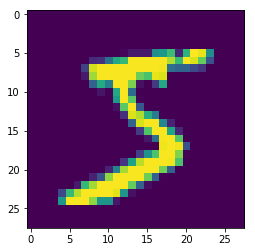

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation,BatchNormalization

model = Sequential()

 
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(28,28,1), name='conv_1')) # 26
model.add(BatchNormalization(name='bn_1'))
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_2')) # 24
model.add(BatchNormalization(name='bn_2'))
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_3')) # 22
model.add(BatchNormalization(name='bn_3'))
model.add(Dropout(0.10,name='dropout_1'))

model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # 11

model.add(Conv2D(10, (3, 3), activation='relu', name='conv_4')) # 9
model.add(BatchNormalization(name='bn_4'))
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_5')) # 7
model.add(BatchNormalization(name='bn_5'))
model.add(Dropout(0.10,name='dropout_2'))
model.add(Conv2D(32, (3, 3), activation='relu', name='conv_6')) # 5
model.add(BatchNormalization(name='bn_6'))
model.add(Dropout(0.10,name='dropout_3'))

model.add(Conv2D(10, (1, 1), activation='relu', name='conv_6a')) # 5
model.add(BatchNormalization(name='bn_7'))
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_7')) #3
model.add(BatchNormalization(name='bn_8'))
model.add(Conv2D(10, (3, 3), name='conv_8')) # 1
model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 26, 26, 10)        40        
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 10)        910       
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 24, 24, 10)        40        
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 10)        910       
_________________________________________________________________
bn_3 (BatchNormalizat

In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.04, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_acc', verbose=0, save_best_only=True)

model.fit(X_train, Y_train, batch_size=128, epochs=25, validation_data=(X_test, Y_test), callbacks=[checkpointer], verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 186us/step - loss: 0.0527 - acc: 0.9839 - val_loss: 0.0318 - val_acc: 0.9896
Epoch 2/25
60000/60000 [==============================] - 7s 118us/step - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0277 - val_acc: 0.9928
Epoch 3/25
60000/60000 [==============================] - 7s 118us/step - loss: 0.0185 - acc: 0.9940 - val_loss: 0.0231 - val_acc: 0.9929
Epoch 4/25
60000/60000 [==============================] - 7s 118us/step - loss: 0.0164 - acc: 0.9948 - val_loss: 0.0242 - val_acc: 0.9929
Epoch 5/25
60000/60000 [==============================] - 7s 118us/step - loss: 0.0143 - acc: 0.9953 - val_loss: 0.0243 - val_acc: 0.9928
Epoch 6/25
60000/60000 [==============================] - 7s 119us/step - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0263 - val_acc: 0.9928
Epoch 7/25
60000/60000 [==============================] - 8s 132us/step - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0234 -

In [0]:
model.load_weights('best_weights.hdf5')
score = model.evaluate(X_test, Y_test,verbose=0)

In [0]:
print(score)

[0.021159460483758448, 0.9946]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.27809041e-10 6.36368682e-08 3.62272402e-07 7.58629568e-08
  1.35064520e-11 4.39341705e-12 3.77590618e-13 9.99999404e-01
  2.90047142e-09 9.53004076e-08]
 [1.43637408e-07 1.44414071e-06 9.99998212e-01 2.21346008e-09
  1.87848897e-07 9.14215405e-12 3.45752440e-08 1.35698501e-08
  2.52203303e-09 9.37687211e-13]
 [8.96998014e-12 1.00000000e+00 1.27095154e-10 5.03264874e-10
  1.49694568e-08 2.08642459e-09 9.58159885e-10 4.10262091e-09
  5.12493437e-10 1.43147256e-11]
 [9.99997973e-01 2.86201271e-11 1.62823074e-10 7.90876566e-12
  1.09852037e-10 3.69699897e-08 1.98816770e-06 2.66133643e-11
  9.37913747e-10 3.35974839e-08]
 [7.97660115e-13 1.96980062e-12 1.64912311e-12 4.44744203e-14
  1.00000000e+00 1.29742050e-11 6.49647836e-10 7.73327374e-11
  1.29265626e-10 4.08731431e-08]
 [1.04847433e-11 9.99999404e-01 3.89024785e-10 2.83997881e-10
  1.91747489e-07 6.88061830e-11 7.97322763e-11 4.55059279e-07
  3.64563102e-10 1.80284315e-10]
 [5.65531962e-11 1.71259744e-05 5.80818842e-08 8.71918449e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Number of Filters :  10


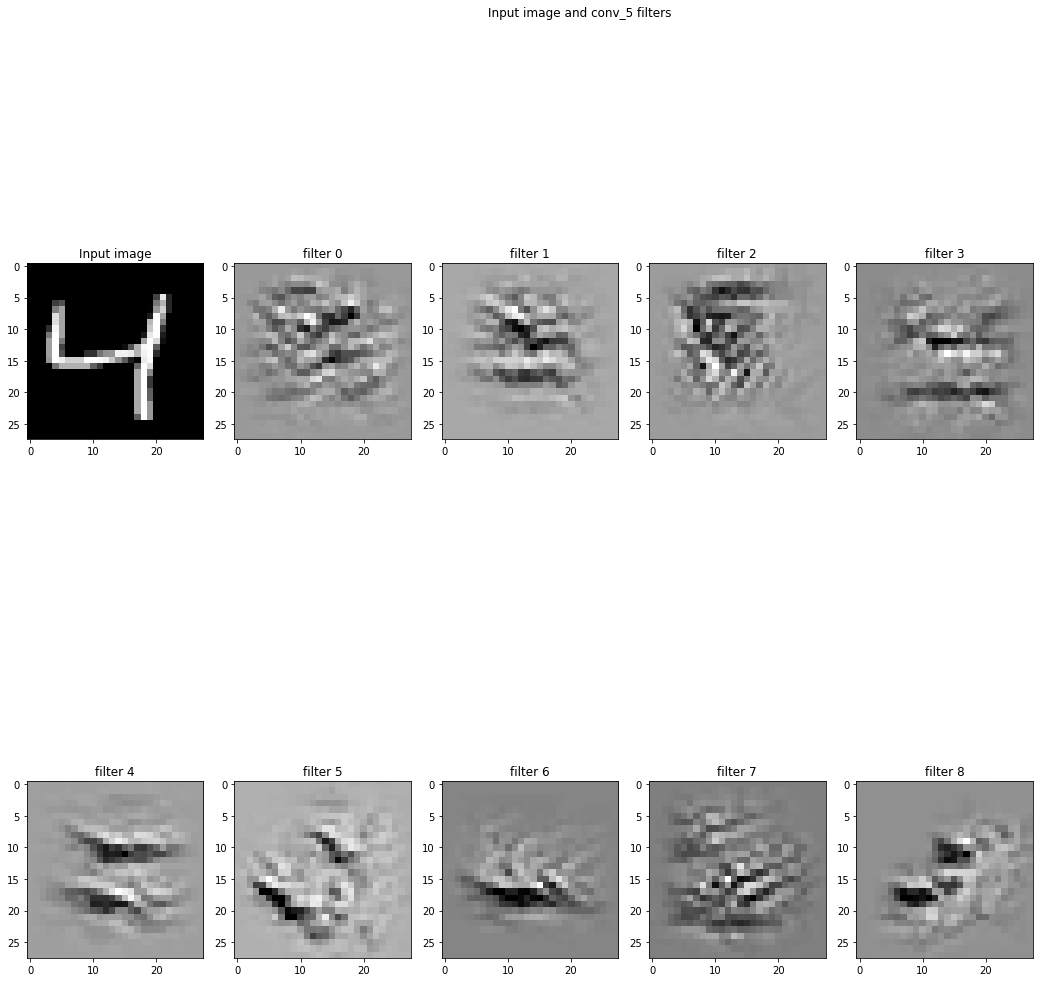

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print("Number of Filters : ",layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 8
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    elif layer_output.shape[3] >= 5:
        plot_x, plot_y = 2, 5
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (16, 16))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.0, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

# Observations :

1. We were able to reach a validation accuracy of 99.46% in 8 epochs.
2. Training/validation accuracy has high volatility in the starting because of a large learning rate.
3. The validation accuracy looks stable towards the end. This is because of the diminishing learning rate which prevents oscillations around the global minima.


# Conclusion:

We were able to achieve the objective of 99.4% validation accuracy using less than 15K parameters with the help of the following concepts.

1. Reduced number of kernels to reduce parameters
2. 1x1 Convolutions to reduce channel size thereby reduce parameters
3. Dropouts to prevent overfitting
4. Bigger batch size to improve training speed
5. Batch normalization to reach target accuracy faster
6. Increased learning rate to speed up weight updates in the initial epochs
7. Decaying learning rate to reduce oscillations around global minima
8. Model checkpoints to save the best model.
